In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [3]:
print("Customers Data:")
print(customers_df.info())

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [4]:
print("Products Data:")
products_df.info()
products_df.columns

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [5]:
print("Transactions Data:")
transactions_df.info()

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [6]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
  

# Customer Analysis

### 1. Customer Distribution by Region

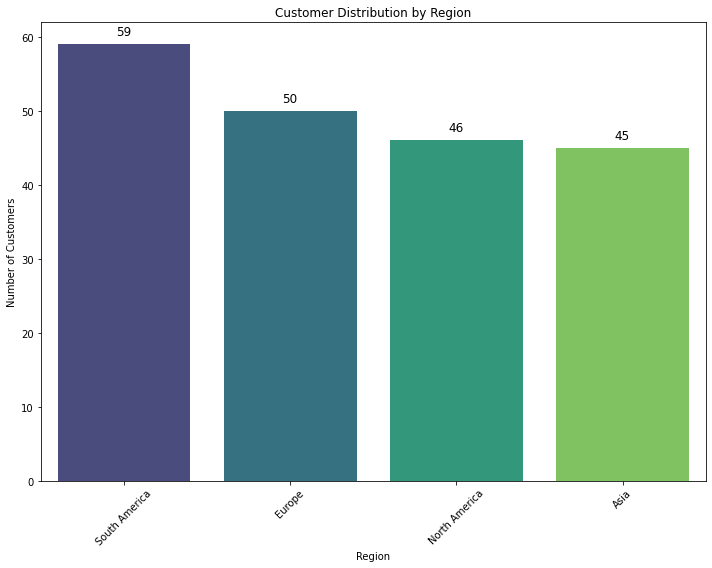

In [16]:
# Customer Distribution by Region
region_dist = customers_df['Region'].value_counts()

plt.figure(figsize=(10, 8))

# Create the bar plot
ax = sns.barplot(x=region_dist.index, y=region_dist.values, palette="viridis")

# Add values on top of the bars with proper spacing
for p in ax.patches:
    height = p.get_height()
    label = f'{height:.0f}' 
    
    # Adjust position for annotation 
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2., height),  # Position the label at the top of each bar
        ha='center', va='bottom',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 6),  # Offset the text slightly upwards for spacing
        textcoords='offset points'
    )

# Plot customization
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Customer Distribution by Region')
plt.show()


### 2. Customer signup trends

Customer Signup Trends by Month:


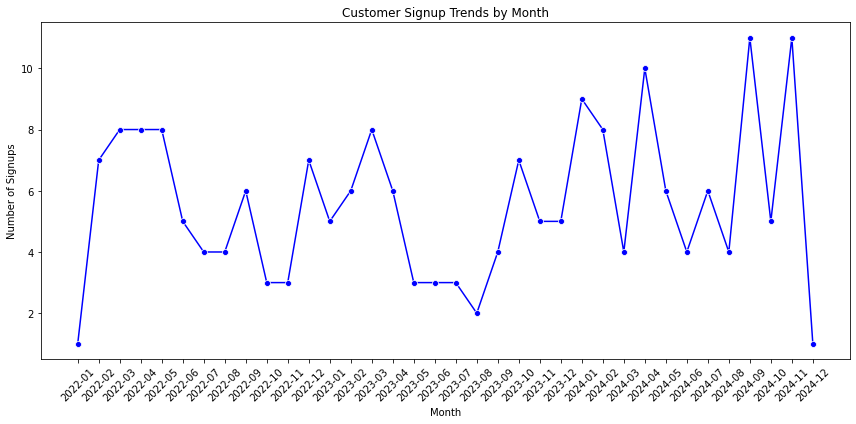

In [17]:
# Extract year and month for grouping
customers_df['YearMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Customer signup trends by month
print("Customer Signup Trends by Month:")
signup_trends_monthly = customers_df['YearMonth'].value_counts().sort_index()

# Plot signup trends by month
plt.figure(figsize=(12, 6))
signup_trends_monthly.index = signup_trends_monthly.index.astype(str)  # Convert to string for better display
sns.lineplot(
    x=signup_trends_monthly.index,
    y=signup_trends_monthly.values,
    marker='o',
    color='blue'
)
plt.title('Customer Signup Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Customer signup trends by month')
plt.show()


# Product Analysis

### 1. Product category distribution

In [9]:
# Product category distribution
print("Product Distribution by Category:")
category_dist = products_df['Category'].value_counts()
print(category_dist)

Product Distribution by Category:
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


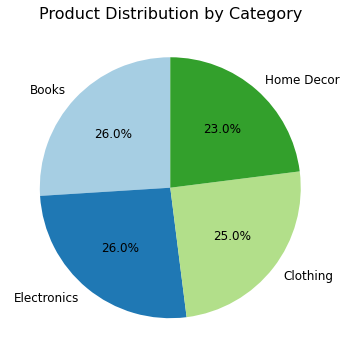

In [26]:
plt.figure(figsize=(8, 6))
category_dist.plot.pie(
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors, 
        textprops={'fontsize': 12}
    )
plt.title("Product Distribution by Category", fontsize=16)
plt.ylabel('') 
plt.savefig('Product Distribution by Category')
plt.show()

### 2. Price distribution by category

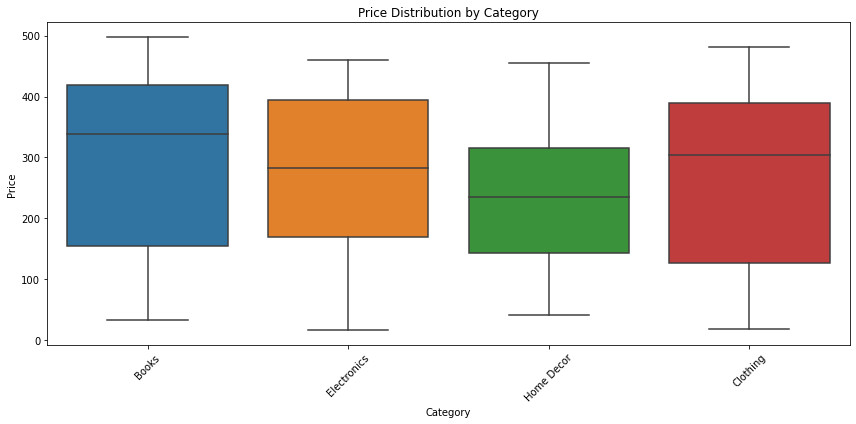

In [18]:
# Plot price distribution by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products_df)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Price distribution by category')

### 3. Top selling products by Quantity

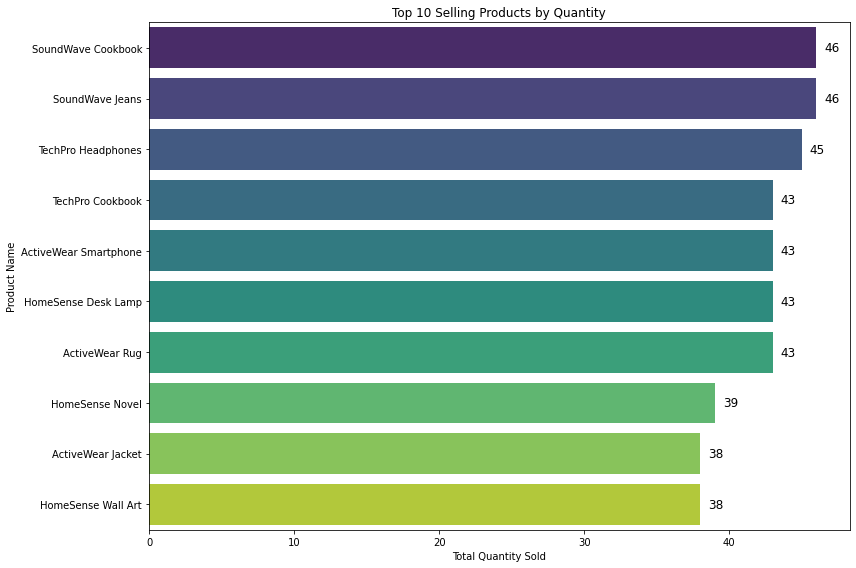

In [19]:
# Calculate total quantity sold per product
product_sales = transactions_df.groupby('ProductID')['Quantity'].sum()
top_products = product_sales.nlargest(10)

# Merge with products_df to get product names
top_products_df = top_products.reset_index().merge(
    products_df[['ProductID', 'ProductName']],
    on='ProductID'
)

# Plot the top selling products
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Quantity', 
    y='ProductName', 
    data=top_products_df.sort_values(by='Quantity', ascending=False), 
    palette='viridis'
)

# Add quantity labels on the bars with proper spacing
for p in ax.patches:
    width = p.get_width()
    label = f'{width:.0f}'
    
    # Adjust position for annotation 
    ax.annotate(
        label,
        (width, p.get_y() + p.get_height() / 2.),  # Position the label at the end of each bar
        ha='left', va='center',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(8, 0),  # Offset the text slightly to the right for better spacing
        textcoords='offset points'
    )

# Plot customization
plt.title('Top 10 Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.savefig('Top 10 Selling Products by Quantity')
plt.show()


### 3. Top selling products by Revenue

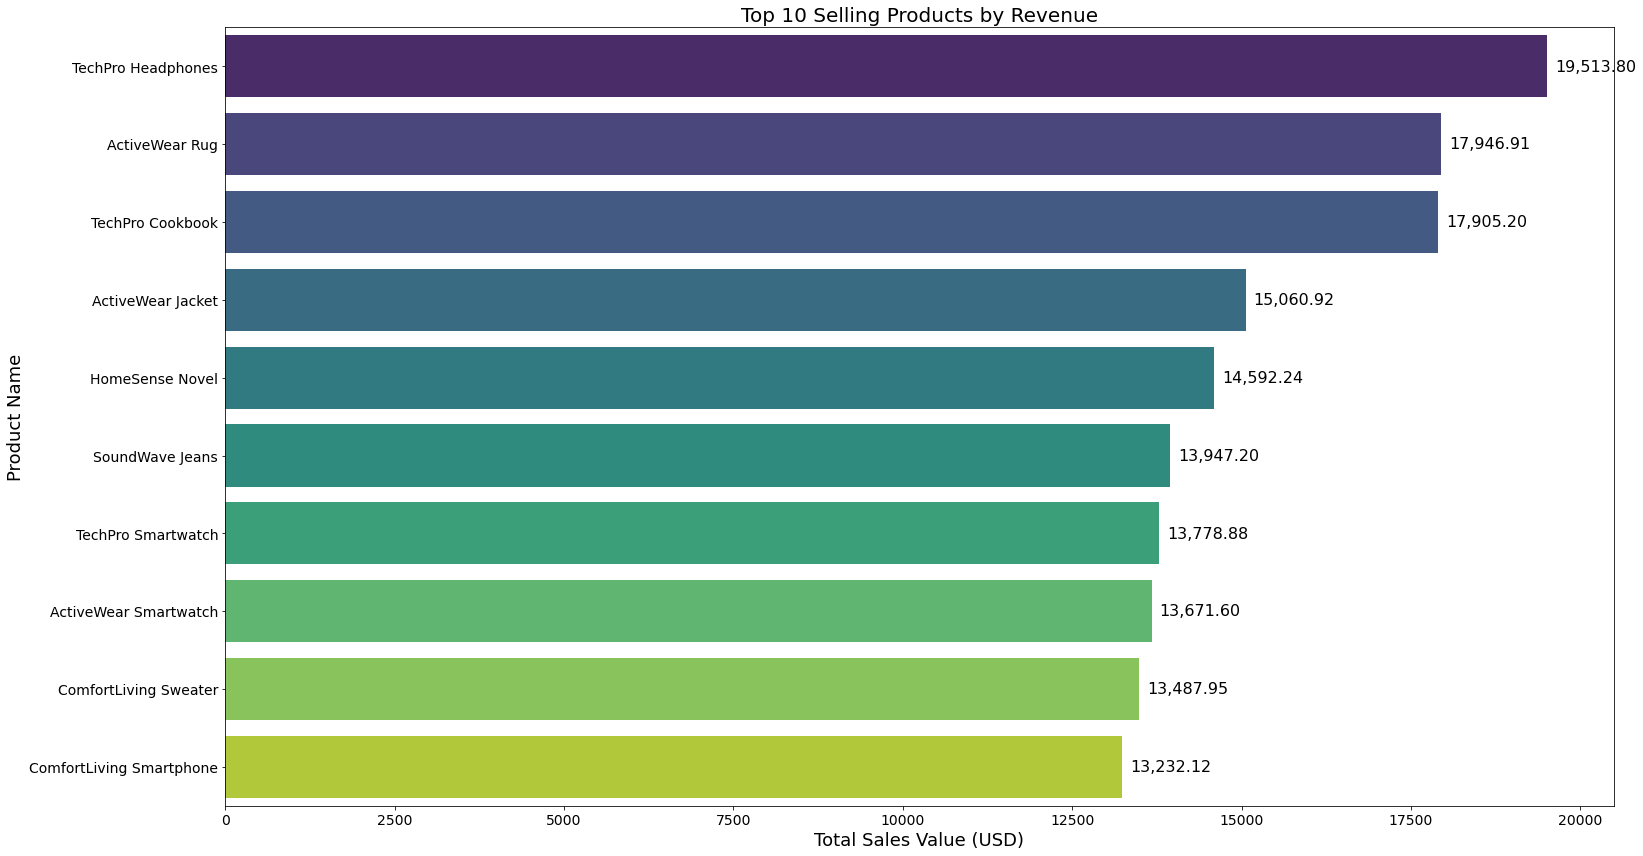

In [20]:
# Calculate total value for each product in transactions
transactions_df['TotalValue'] = transactions_df['Quantity'] * transactions_df['Price']

# Group by ProductID and calculate the total value
product_sales_value = transactions_df.groupby('ProductID')['TotalValue'].sum()

# Get the top 10 selling products by total value
top_products_value = product_sales_value.nlargest(10)

# Merge with products_df to get product names
top_products_value_df = top_products_value.reset_index().merge(
    products_df[['ProductID', 'ProductName']],
    on='ProductID'
)

# Plot the top selling products by total value
plt.figure(figsize=(23, 12))
ax = sns.barplot(
    x='TotalValue', 
    y='ProductName', 
    data=top_products_value_df.sort_values(by='TotalValue', ascending=False),
    palette='viridis'
)

# Add total sales value labels on the bars with proper spacing
for p in ax.patches:
    width = p.get_width()
    label = f'{width:,.2f}'  # Format value with commas and two decimal places
    
    # Adjust position for annotation
    ax.annotate(
        label,
        (width, p.get_y() + p.get_height() / 2.),  # Position the label at the end of each bar
        ha='left', va='center',  # Horizontal and vertical alignment
        fontsize=16, color='black',  # Increased font size
        xytext=(8, 0),  # Offset the text slightly to the right of the bar
        textcoords='offset points'
    )

# Plot customization
plt.title('Top 10 Selling Products by Revenue', fontsize=20)

# Increase font size of x-axis and y-axis labels
plt.xlabel('Total Sales Value (USD)', fontsize=18)
plt.ylabel('Product Name', fontsize=18)

# Increase font size of tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('Top 10 Selling Products by Revenue')
plt.show()


# Transaction Analysis

###  Monthly revenue trends

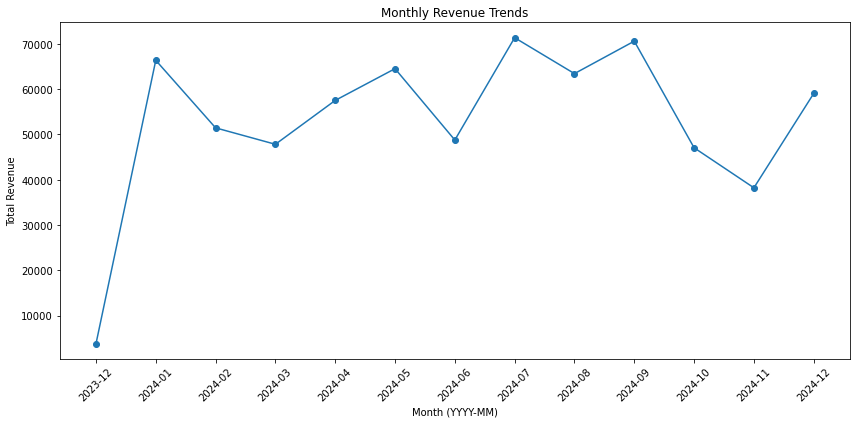

In [27]:
# Add month and year columns
transactions_df['Year'] = transactions_df['TransactionDate'].dt.year
transactions_df['Month'] = transactions_df['TransactionDate'].dt.month

# Monthly revenue trends
monthly_revenue = transactions_df.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()

# Create a new 'Year-Month' column for x-axis labeling
monthly_revenue['Year-Month'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str).str.zfill(2)


# Plot monthly revenue trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Year-Month'], monthly_revenue['TotalValue'], marker='o')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month (YYYY-MM)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.savefig('Monthly Revenue Trends')
plt.show()


### Revenue by category


Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


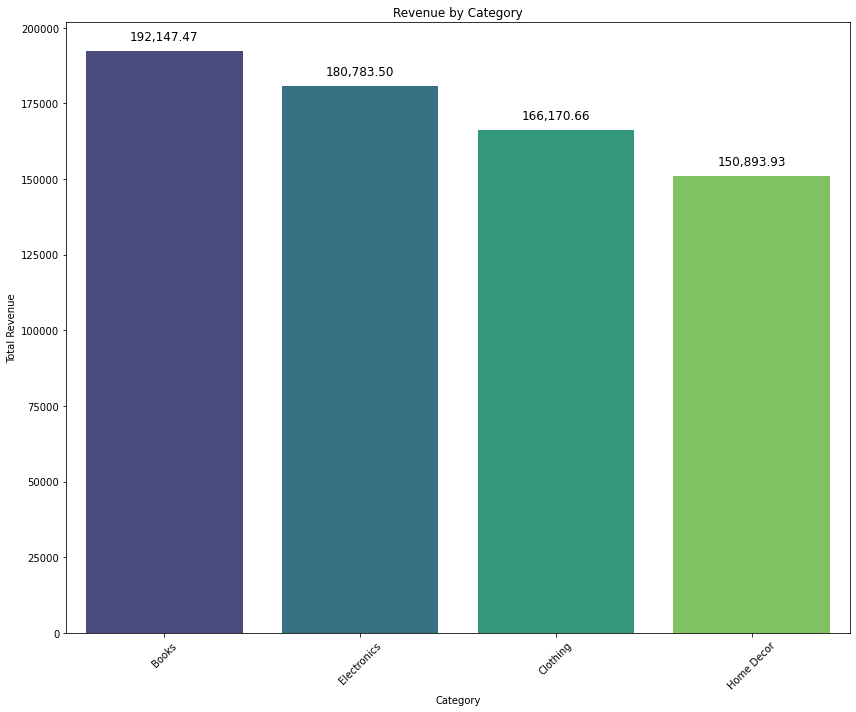

In [28]:
# Revenue by category
merged_trans = transactions_df.merge(products_df[['ProductID', 'Category']], on='ProductID')
category_revenue = merged_trans.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Display revenue by category
print("\nRevenue by Category:")
print(category_revenue)

# Plot revenue by category using Seaborn with viridis palette
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    x=category_revenue.index, 
    y=category_revenue.values, 
    palette='viridis'
)

# Add total revenue labels on the bars with proper spacing
for p in ax.patches:
    height = p.get_height()
    label = f'{height:,.2f}'  # Format value with commas and two decimal places
    
    # Adjust position for annotation (adding vertical spacing for better visibility)
    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2., height),  # Position the label at the top of each bar
        ha='center', va='bottom',  # Horizontal and vertical alignment
        fontsize=12, color='black',  # Font size and color
        xytext=(0, 8),  # Offset the text slightly upwards for spacing
        textcoords='offset points'
    )

# Plot customization
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Revenue by Category')
plt.show()


# Key business insights

In [15]:
def generate_business_insights(customers_df, products_df, transactions_df):
    """
    Generate comprehensive business insights from the e-commerce data
    """
    insights = []
    
    # 1. Regional Analysis
    region_dist = customers_df['Region'].value_counts()
    region_revenue = transactions_df.merge(customers_df[['CustomerID', 'Region']], on='CustomerID')\
        .groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    
    insights.append({
        'category': 'Regional Performance',
        'insight': f"The top performing region is {region_revenue.index[0]} generating ${region_revenue.iloc[0]:,.2f} in revenue, " +
                  f"while having {region_dist[region_revenue.index[0]]} customers. " +
                  f"However, {region_dist.index[0]} has the most customers ({region_dist.iloc[0]}), " +
                  "suggesting potential for revenue optimization in customer-dense regions."
    })
    
    # 2. Product Category Analysis
    category_performance = transactions_df.merge(products_df[['ProductID', 'Category']], on='ProductID')\
        .groupby('Category').agg({
            'TotalValue': 'sum',
            'Quantity': 'sum'
        }).sort_values('TotalValue', ascending=False)
    
    insights.append({
        'category': 'Category Performance',
        'insight': f"The {category_performance.index[0]} category leads with ${category_performance['TotalValue'].iloc[0]:,.2f} in revenue " +
                  f"and {category_performance['Quantity'].iloc[0]:,} units sold. " +
                  f"The {category_performance.index[-1]} category shows lowest performance, indicating potential " +
                  "need for category optimization or marketing focus."
    })
    
    # 3. Customer Purchase Patterns
    customer_purchase_freq = transactions_df.groupby('CustomerID').size()
    avg_purchase_value = transactions_df.groupby('CustomerID')['TotalValue'].mean()
    
    insights.append({
        'category': 'Customer Behavior',
        'insight': f"Average customer makes {customer_purchase_freq.mean():.1f} purchases. " +
                  f"{(customer_purchase_freq > 1).mean()*100:.1f}% of customers are repeat buyers. " +
                  f"Average purchase value per customer is ${avg_purchase_value.mean():.2f}, with highest " +
                  f"spending customer averaging ${avg_purchase_value.max():.2f} per transaction."
    })
    
    # 4. Seasonal Trends
    monthly_sales = transactions_df.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()
    monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)
    peak_month = monthly_sales.loc[monthly_sales['TotalValue'].idxmax()]
    
    insights.append({
        'category': 'Seasonal Trends',
        'insight': f"Peak sales occur in {peak_month['YearMonth']} with ${peak_month['TotalValue']:,.2f} in revenue. " +
                  f"Monthly revenue varies by {(monthly_sales['TotalValue'].max() / monthly_sales['TotalValue'].min() - 1)*100:.1f}% " +
                  "between peak and low months, indicating significant seasonal patterns."
    })
    
    # 5. Product Performance
    product_performance = transactions_df.merge(products_df[['ProductID', 'ProductName', 'Price']], on='ProductID')\
        .groupby('ProductID').agg({
            'Quantity': 'sum',
            'TotalValue': 'sum',
            'ProductName': 'first'
        }).sort_values('TotalValue', ascending=False)
    
    insights.append({
        'category': 'Product Performance',
        'insight': f"Top selling product '{product_performance['ProductName'].iloc[0]}' generated " +
                  f"${product_performance['TotalValue'].iloc[0]:,.2f} in revenue with {product_performance['Quantity'].iloc[0]} units sold. " +
                  f"Top 10 products account for {(product_performance['TotalValue'].head(10).sum() / product_performance['TotalValue'].sum())*100:.1f}% " +
                  "of total revenue."
    })
    
    # Print insights in a formatted way
    print("\n=== BUSINESS INSIGHTS ANALYSIS ===\n")
    for idx, insight in enumerate(insights, 1):
        print(f"{idx}. {insight['category']}:")
        print(f"   {insight['insight']}")
        print()
    
    return insights

# Example usage:
if __name__ == "__main__":
    insights = generate_business_insights(customers_df, products_df, transactions_df)


=== BUSINESS INSIGHTS ANALYSIS ===

1. Regional Performance:
   The top performing region is South America generating $219,352.56 in revenue, while having 59 customers. However, South America has the most customers (59), suggesting potential for revenue optimization in customer-dense regions.

2. Category Performance:
   The Books category leads with $192,147.47 in revenue and 681 units sold. The Home Decor category shows lowest performance, indicating potential need for category optimization or marketing focus.

3. Customer Behavior:
   Average customer makes 5.0 purchases. 94.0% of customers are repeat buyers. Average purchase value per customer is $687.58, with highest spending customer averaging $1323.13 per transaction.

4. Seasonal Trends:
   Peak sales occur in 2024-7 with $71,366.39 in revenue. Monthly revenue varies by 1793.2% between peak and low months, indicating significant seasonal patterns.

5. Product Performance:
   Top selling product 'TechPro Headphones' generated $